In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
raw_df_match_details = pd.read_csv('../data/raw/match_details.csv')
raw_df_player_attr = pd.read_csv('../data/raw/player_attributes.csv')

In [3]:
raw_df_player_attr

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,4,218353,505942,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,5,218353,505942,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183973,183974,102359,39902,2009-08-30 00:00:00,83.0,85.0,right,medium,low,84.0,...,88.0,83.0,22.0,31.0,30.0,9.0,20.0,84.0,20.0,20.0
183974,183975,102359,39902,2009-02-22 00:00:00,78.0,80.0,right,medium,low,74.0,...,88.0,70.0,32.0,31.0,30.0,9.0,20.0,73.0,20.0,20.0
183975,183976,102359,39902,2008-08-30 00:00:00,77.0,80.0,right,medium,low,74.0,...,88.0,70.0,32.0,31.0,30.0,9.0,20.0,73.0,20.0,20.0
183976,183977,102359,39902,2007-08-30 00:00:00,78.0,81.0,right,medium,low,74.0,...,88.0,53.0,28.0,32.0,30.0,9.0,20.0,73.0,20.0,20.0


In [4]:
# raw_df_match_details.info()

In [5]:
# raw_df_player_attr.info()

In [6]:
raw_df_match_details = (raw_df_match_details
 .assign(date=pd.to_datetime(raw_df_match_details['date']),
         result_match=lambda df: (df['result_match'] == 'H').astype(int))
 )

In [7]:
raw_df_match_details['date'] = pd.to_datetime(raw_df_match_details['date'])
raw_df_player_attr['date'] = pd.to_datetime(raw_df_player_attr['date'])
raw_df_match_details.sort_values(by=['season', 'date'],inplace=True)
# raw_df_match_details.drop('stage', axis=1, inplace=True)

In [8]:
from playerstats import player_stats

players_cols = ['{}_player_{}'.format(team, i) for team in ['home', 'away'] for i in range(1, 12)]

player_stats_dict_series = raw_df_match_details.apply(
    lambda row: player_stats.calculate_player_stat(
        match_row=row,
        df_matches=raw_df_match_details,
        df_player_attr=raw_df_player_attr,
        players=players_cols
    ),
    axis=1
)

new_player_stats_df = pd.json_normalize(player_stats_dict_series)

df = pd.merge(raw_df_match_details, new_player_stats_df, how='left', on='match_api_id')
df.drop(players_cols, axis=1, inplace=True)
matching_columns = [col for col in df.columns if 'player_rating' in col] + [col for col in df.columns if 'aggression_rating' in col] + [col for col in df.columns if 'strength_rating' in col] + [col for col in df.columns if 'acceleration_rating' in col]
df.dropna(subset=matching_columns, inplace=True)
matching_columns_filtered = [c for c in df.columns if c != "date" and c != "season"]

In [9]:
df.head()

,match_api_id,season,stage,date,away_team,home_team,home_team_goal,away_team_goal,result_match,away_shoton,...,strength_rating_away_player_9,aggression_rating_away_player_9,rating_away_player_10,acceleration_rating_away_player_10,strength_rating_away_player_10,aggression_rating_away_player_10,rating_away_player_11,acceleration_rating_away_player_11,strength_rating_away_player_11,aggression_rating_away_player_11
0,489043,2008/2009,1,2008-08-16,8659,9825,1,0,1,0,...,72.0,72.0,73.0,73.0,73.0,73.0,68.0,68.0,68.0,68.0
1,489044,2008/2009,1,2008-08-16,8650,8472,0,1,0,0,...,80.5,80.5,85.0,85.0,85.0,85.0,87.0,87.0,87.0,87.0
2,489045,2008/2009,1,2008-08-16,8528,8654,2,1,1,0,...,77.0,77.0,71.0,71.0,71.0,71.0,75.0,75.0,75.0,75.0
3,489047,2008/2009,1,2008-08-16,8655,8668,2,3,0,0,...,77.0,77.0,76.0,76.0,76.0,76.0,80.0,80.0,80.0,80.0
4,489048,2008/2009,1,2008-08-16,8586,8549,2,1,1,0,...,79.5,79.5,72.5,72.5,72.5,72.5,83.5,83.5,83.5,83.5


In [12]:
df_=df.copy()

In [13]:
from src.preprocessing.shift_data import ShiftDataPreprocessor
import pandas as pd


rating_types = ['rating', 'acceleration_rating', 'strength_rating', 'aggression_rating']

preprocessor = ShiftDataPreprocessor(df_)

home_df = preprocessor.select_and_rename_columns('home_', rating_types)
away_df = preprocessor.select_and_rename_columns('away_', rating_types)

INFO: FootballDataPreprocessor initialized.
INFO: Selecting and renaming columns for home team.
INFO: Columns after renaming for home team:
INFO: ['match_api_id', 'season', 'stage', 'date', 'away_team', 'team', 'team_goal', 'opponent_goal', 'result_match', 'away_shoton', 'team_shoton', 'away_possession', 'team_possession', 'home_rating_player_1', 'home_acceleration_rating_player_1', 'home_strength_rating_player_1', 'home_aggression_rating_player_1', 'home_rating_player_2', 'home_acceleration_rating_player_2', 'home_strength_rating_player_2', 'home_aggression_rating_player_2', 'home_rating_player_3', 'home_acceleration_rating_player_3', 'home_strength_rating_player_3', 'home_aggression_rating_player_3', 'home_rating_player_4', 'home_acceleration_rating_player_4', 'home_strength_rating_player_4', 'home_aggression_rating_player_4', 'home_rating_player_5', 'home_acceleration_rating_player_5', 'home_strength_rating_player_5', 'home_aggression_rating_player_5', 'home_rating_player_6', 'home_

In [12]:
team_df = preprocessor.concatenate_teams(home_df, away_df)
team_df

INFO: Concatenating home and away DataFrames.


Columns only in cols_away: {'aggression_rating_home_player_8', 'aggression_rating_home_player_1', 'aggression_rating_home_player_9', 'acceleration_rating_home_player_4', 'acceleration_rating_home_player_5', 'aggression_rating_home_player_2', 'rating_home_player_9', 'acceleration_rating_home_player_8', 'aggression_rating_home_player_10', 'rating_home_player_11', 'acceleration_rating_home_player_1', 'acceleration_rating_home_player_7', 'is_home', 'rating_home_player_7', 'strength_rating_home_player_6', 'acceleration_rating_home_player_10', 'strength_rating_home_player_9', 'aggression_rating_home_player_5', 'aggression_rating_home_player_4', 'aggression_rating_home_player_11', 'rating_home_player_6', 'rating_home_player_1', 'rating_home_player_3', 'rating_home_player_5', 'rating_home_player_8', 'strength_rating_home_player_5', 'strength_rating_home_player_8', 'home_possession', 'home_team', 'rating_home_player_2', 'strength_rating_home_player_2', 'aggression_rating_home_player_6', 'rating

KeyboardInterrupt: 

In [ ]:
features_to_shift = ['team_shoton', 'team_possession'] + [
    col for col in team_df.columns if any(rating in col for rating in rating_types)
]

shifted_df = preprocessor.shift_features(features_to_shift)

home_prev, away_prev = preprocessor.rename_shifted_columns(shifted_df)

# Merge shifted features back into the original DataFrame
df_merged = preprocessor.merge_shifted_features(home_prev, away_prev)
df_merged.head()

In [ ]:
# Drop original feature columns
df_final = preprocessor.drop_original_columns()

# Handle missing data with row-based imputation
df_clean = preprocessor.handle_missing_data()

# Display the final DataFrame
print(df_clean.head())

# Optional: Get NaN summary for original features before dropping
nan_summary_original = preprocessor.get_nan_summary(features_to_shift)
print(nan_summary_original)

# Optional: Plot NaN summary for original features
preprocessor.plot_nan_summary(nan_summary_original, title='NaN Percentage for Original Features')

# Optional: Get NaN summary for shifted features
nan_summary_shifted = preprocessor.get_nan_summary([col for col in preprocessor.df.columns if col.startswith('home_prev_') or col.startswith('away_prev_')])
print(nan_summary_shifted)

# Optional: Plot NaN summary for shifted features
preprocessor.plot_nan_summary(nan_summary_shifted, title='NaN Percentage for Shifted Features')

In [23]:
# Check for duplicate column names in home_df
print("Checking for duplicate columns in home_df:")
print(home_df.columns.duplicated().any())
if home_df.columns.duplicated().any():
    print("Duplicate columns found in home_df:")
    print(home_df.columns[home_df.columns.duplicated()])

# Check for duplicate column names in away_df
print("\nChecking for duplicate columns in away_df:")
print(away_df.columns.duplicated().any())
if away_df.columns.duplicated().any():
    print("Duplicate columns found in away_df:")
    print(away_df.columns[away_df.columns.duplicated()])

Checking for duplicate columns in home_df:
True
Duplicate columns found in home_df:
Index(['acceleration_rating_home_player_1',
       'acceleration_rating_home_player_2',
       'acceleration_rating_home_player_3',
       'acceleration_rating_home_player_4',
       'acceleration_rating_home_player_5',
       'acceleration_rating_home_player_6',
       'acceleration_rating_home_player_7',
       'acceleration_rating_home_player_8',
       'acceleration_rating_home_player_9',
       'acceleration_rating_home_player_10',
       'acceleration_rating_home_player_11', 'strength_rating_home_player_1',
       'strength_rating_home_player_2', 'strength_rating_home_player_3',
       'strength_rating_home_player_4', 'strength_rating_home_player_5',
       'strength_rating_home_player_6', 'strength_rating_home_player_7',
       'strength_rating_home_player_8', 'strength_rating_home_player_9',
       'strength_rating_home_player_10', 'strength_rating_home_player_11',
       'aggression_rating_home

In [22]:
team_df = pd.concat([home_df, away_df], ignore_index=True)
team_df = team_df.sort_values(by=['team', 'date']).reset_index(drop=True)
team_df.head()

InvalidIndexError: Reindexing only valid with uniquely valued Index objects

In [19]:
features_to_shift = ['team_shoton', 'team_possession'] + [col for col in team_df.columns if 'rating_' in col] + [col for col in team_df.columns if 'rating_acceleration' in col] + [col for col in team_df.columns if 'rating_strength' in col] + [col for col in team_df.columns if 'rating_aggression' in col]
team_df_shifted = team_df.groupby('team')[features_to_shift].shift(1)

home_prev = team_df[team_df['is_home'] == 1][['match_api_id']].copy()
home_prev = home_prev.merge(team_df_shifted, left_index=True, right_index=True)
home_prev = home_prev.rename(columns=lambda x: 'home_prev_' + x if x != 'match_api_id' else x)

away_prev = team_df[team_df['is_home'] == 0][['match_api_id']].copy()
away_prev = away_prev.merge(team_df_shifted, left_index=True, right_index=True)
away_prev = away_prev.rename(columns=lambda x: 'away_prev_' + x if x != 'match_api_id' else x)

df_ = df_.merge(home_prev, on='match_api_id', how='left')

df_ = df_.merge(away_prev, on='match_api_id', how='left')

original_home_features = ['home_shoton', 'home_possession'] + [
    col for col in df_.columns if col.startswith('rating_home_player_')] + [
    col for col in df_.columns if col.startswith('acceleration_rating_home_player_')] + [
    col for col in df_.columns if col.startswith('strength_rating_home_player_')] + [
    col for col in df_.columns if col.startswith('aggressiopn_rating_home_player_')
]

original_away_features = ['away_shoton', 'away_possession'] + [
    col for col in df_.columns if col.startswith('rating_away_player_')]+ [
    col for col in df_.columns if col.startswith('acceleration_rating_away_player_')]+ [
    col for col in df_.columns if col.startswith('strength_rating_away_player_')]+ [
    col for col in df_.columns if col.startswith('aggression_rating_away_player_')
]

df_final = df_.drop(columns=original_home_features + original_away_features)

In [20]:
df_final.head()

,match_api_id,season,stage,date,away_team,home_team,home_team_goal,away_team_goal,result_match,player_aggression_rating_home_player_1,...,away_prev_player_rating_away_player_2,away_prev_player_rating_away_player_3,away_prev_player_rating_away_player_4,away_prev_player_rating_away_player_5,away_prev_player_rating_away_player_6,away_prev_player_rating_away_player_7,away_prev_player_rating_away_player_8,away_prev_player_rating_away_player_9,away_prev_player_rating_away_player_10,away_prev_player_rating_away_player_11
0,489043,2008/2009,1,2008-08-16,8659,9825,1,0,1,74.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,489044,2008/2009,1,2008-08-16,8650,8472,0,1,0,79.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,489045,2008/2009,1,2008-08-16,8528,8654,2,1,1,78.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,489047,2008/2009,1,2008-08-16,8655,8668,2,3,0,80.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,489048,2008/2009,1,2008-08-16,8586,8549,2,1,1,73.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [47]:
columns_to_check = [
    original_home_features + original_away_features
]
columns_to_check

[['home_shoton',
  'home_possession',
  'player_rating_home_player_1',
  'player_rating_home_player_2',
  'player_rating_home_player_3',
  'player_rating_home_player_4',
  'player_rating_home_player_5',
  'player_rating_home_player_6',
  'player_rating_home_player_7',
  'player_rating_home_player_8',
  'player_rating_home_player_9',
  'player_rating_home_player_10',
  'player_rating_home_player_11',
  'player_acceleration_rating_home_player_1',
  'player_acceleration_rating_home_player_2',
  'player_acceleration_rating_home_player_3',
  'player_acceleration_rating_home_player_4',
  'player_acceleration_rating_home_player_5',
  'player_acceleration_rating_home_player_6',
  'player_acceleration_rating_home_player_7',
  'player_acceleration_rating_home_player_8',
  'player_acceleration_rating_home_player_9',
  'player_acceleration_rating_home_player_10',
  'player_acceleration_rating_home_player_11',
  'player_strength_rating_home_player_1',
  'player_strength_rating_home_player_2',
  'pl

                                              NaN Count  NaN Percentage (%)
away_prev_away_rating_player_7                     2391           78.703094
away_prev_away_aggression_rating_player_11         2391           78.703094
away_prev_away_strength_rating_player_11           2391           78.703094
away_prev_away_acceleration_rating_player_11       2391           78.703094
away_prev_away_rating_player_11                    2391           78.703094
...                                                 ...                 ...
aggression_rating_home_player_9                       0            0.000000
aggression_rating_home_player_1                       0            0.000000
strength_rating_home_player_1                         0            0.000000
acceleration_rating_home_player_1                     0            0.000000
rating_home_player_1                                  0            0.000000

[440 rows x 2 columns]


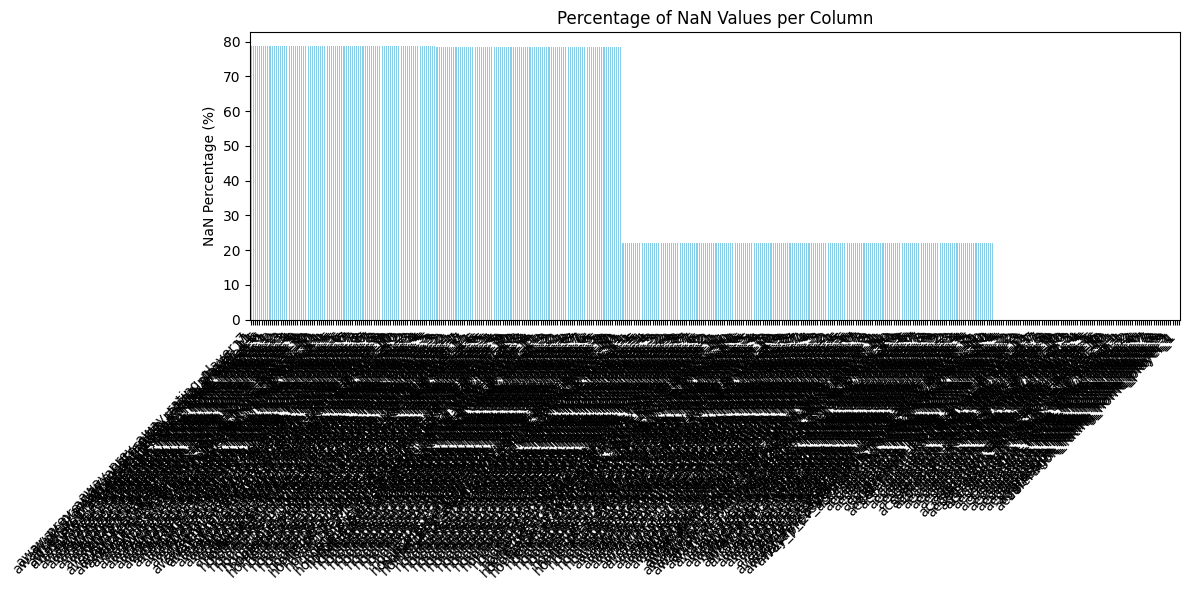


Columns with more than 10% NaN values:
                                              NaN Count  NaN Percentage (%)
away_prev_away_rating_player_7                     2391           78.703094
away_prev_away_aggression_rating_player_11         2391           78.703094
away_prev_away_strength_rating_player_11           2391           78.703094
away_prev_away_acceleration_rating_player_11       2391           78.703094
away_prev_away_rating_player_11                    2391           78.703094
...                                                 ...                 ...
away_prev_aggression_rating_away_player_11          666           21.922317
away_prev_rating_away_player_10                     666           21.922317
away_prev_acceleration_rating_away_player_10        666           21.922317
away_prev_strength_rating_away_player_10            666           21.922317
away_prev_aggression_rating_away_player_10          666           21.922317

[352 rows x 2 columns]


In [14]:

# 3. Calculate the number of NaN values per column
nan_counts = df_merged.filter(like='rating').isna().sum()

# 4. Calculate the percentage of NaN values per column
nan_percent = (nan_counts / len(df_merged.filter(like='rating'))) * 100

# 5. Combine the results into a summary DataFrame
nan_summary = pd.DataFrame({
    'NaN Count': nan_counts,
    'NaN Percentage (%)': nan_percent
})

# 6. Sort the summary by percentage of NaN values in descending order
nan_summary = nan_summary.sort_values(by='NaN Percentage (%)', ascending=False)

# 7. Display the summary
print(nan_summary)

# 8. (Optional) Visualize the NaN percentages
import matplotlib.pyplot as plt

nan_summary['NaN Percentage (%)'].plot(kind='bar', figsize=(12, 6), color='skyblue')
plt.ylabel('NaN Percentage (%)')
plt.title('Percentage of NaN Values per Column')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# 9. (Optional) List columns with more than 10% NaN values
high_nan = nan_summary[nan_summary['NaN Percentage (%)'] > 10]
print("\nColumns with more than 10% NaN values:")
print(high_nan)

In [50]:
df_final.columns

Index(['match_api_id', 'season', 'stage', 'date', 'away_team', 'home_team',
       'home_team_goal', 'away_team_goal', 'result_match',
       'player_aggression_rating_home_player_1',
       'player_aggression_rating_home_player_2',
       'player_aggression_rating_home_player_3',
       'player_aggression_rating_home_player_4',
       'player_aggression_rating_home_player_5',
       'player_aggression_rating_home_player_6',
       'player_aggression_rating_home_player_7',
       'player_aggression_rating_home_player_8',
       'player_aggression_rating_home_player_9',
       'player_aggression_rating_home_player_10',
       'player_aggression_rating_home_player_11', 'home_prev_team_shoton',
       'home_prev_team_possession', 'home_prev_player_rating_home_player_1',
       'home_prev_player_rating_home_player_2',
       'home_prev_player_rating_home_player_3',
       'home_prev_player_rating_home_player_4',
       'home_prev_player_rating_home_player_5',
       'home_prev_player_ratin